In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd
import seaborn as sns
import datetime
plt.rcParams["figure.figsize"] = [15, 7]
pd.set_option('display.max_columns', None)

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

# SQL query to import all citation data
code_violations_query = ''' select * from [City_of_Scottsdale].[dbo].[np_CodeViolations] '''

code_violations = pd.read_sql(code_violations_query, connection)
connection.close()

# convert latitude and longitude attributes to numeric from object
# can I combine both of the below lines of code into one?
code_violations['_Latitude_'] = pd.to_numeric(code_violations['_Latitude_'], errors="coerce")
code_violations['_Longitude_'] = pd.to_numeric(code_violations['_Longitude_'], errors="coerce")

code_violations.head()

,_ViolationID_,_ComplaintID_,_DateComplaintReceived_,_DateComplaintClosed_,_ComplaintStatus_,_ViolationCategory_,_ViolationCode_,_StreetNumber_,_StreetDirection_,_StreetName_,_StreetType_,_SuiteApt_,_UnitNumber_,_ZipCode_,_ParcelCode_,_Subdivision_,_LotNumber_,_Latitude_,_Longitude_
0,345175,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,Zoning-Administration and Procedures,1.1101,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
1,345176,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec...,6.1060.A.1,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
2,345177,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,Zoning-Native Plant Program,7.501.1.b,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
3,355908,247116,2014-08-11 09:54:15.710000000,2019-04-09 15:38:13.367000000,CLOSED-NOV ISSUED,Zoning-Uses Permitted Residential,3.100,8144,E,VIA DONA,RD,,,85266,216-70-005T,,,33.749464,-111.904722
4,356293,247116,2014-08-11 09:54:15.710000000,2019-04-09 15:38:13.367000000,CLOSED-NOV ISSUED,Zoning-Uses Permitted Residential,5.012(A)(R1-190),8144,E,VIA DONA,RD,,,85266,216-70-005T,,,33.749464,-111.904722


In [12]:
code_violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16449 entries, 0 to 16448
Data columns (total 19 columns):
_ViolationID_              16449 non-null object
_ComplaintID_              16449 non-null object
_DateComplaintReceived_    16449 non-null object
_DateComplaintClosed_      16449 non-null object
_ComplaintStatus_          16449 non-null object
_ViolationCategory_        16449 non-null object
_ViolationCode_            16449 non-null object
_StreetNumber_             16449 non-null object
_StreetDirection_          16449 non-null object
_StreetName_               16449 non-null object
_StreetType_               16449 non-null object
_SuiteApt_                 16449 non-null object
_UnitNumber_               16449 non-null object
_ZipCode_                  16449 non-null object
_ParcelCode_               16449 non-null object
_Subdivision_              16449 non-null object
_LotNumber_                16449 non-null object
_Latitude_                 16449 non-null float64
_Longitu

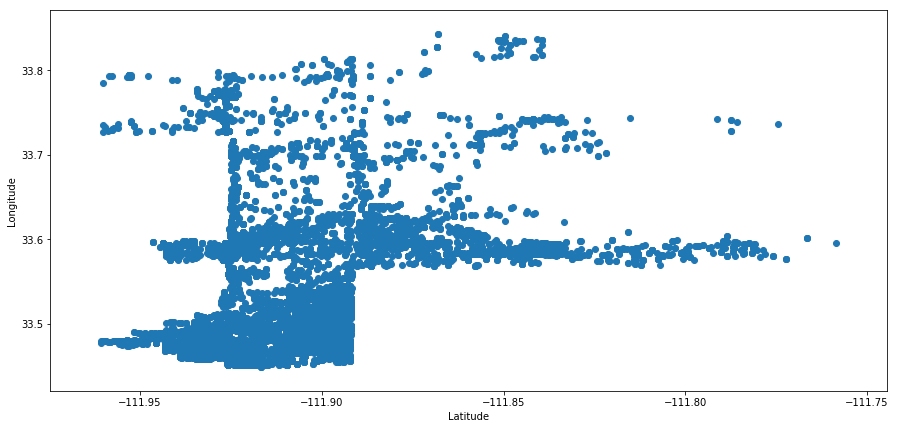

In [16]:
plt.rcParams["figure.figsize"] = [15, 7]

plt.scatter(x=code_violations['_Longitude_'], y=code_violations['_Latitude_'])
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.show()